In [1]:
import pandas as pd

data_er = pd.read_csv('currency_exchange_rates_02-01-1995_-_02-05-2018.csv')
#print(data_er)

In [3]:
#drop col 1
data_er_cleaned = data_er.drop(data_er.columns[0], axis=1)
print(data_er_cleaned.head())

   Algerian Dinar  Australian Dollar  Bahrain Dinar  Bolivar Fuerte  \
0             NaN                NaN            NaN             NaN   
1             NaN                NaN          0.376             NaN   
2             NaN             0.7704          0.376             NaN   
3             NaN             0.7693          0.376             NaN   
4             NaN             0.7699          0.376             NaN   

   Botswana Pula  Brazilian Real  Brunei Dollar  Canadian Dollar  \
0            NaN             NaN            NaN              NaN   
1            NaN           0.843            NaN           1.4035   
2            NaN           0.844            NaN           1.4026   
3            NaN           0.844            NaN           1.4002   
4            NaN           0.842            NaN           1.4002   

   Chilean Peso  Chinese Yuan  ...  South African Rand  Sri Lanka Rupee  \
0           NaN           NaN  ...                 NaN              NaN   
1           Na

In [3]:
#Drop date label as well
data_er_cleaned.drop('Time Serie', axis=1, inplace=True)
print(data_er_cleaned.shape)
print(data_er_cleaned.head())

(5217, 22)
  AUSTRALIA - AUSTRALIAN DOLLAR/US$ EURO AREA - EURO/US$  \
0                            1.5172               0.9847   
1                            1.5239                 0.97   
2                            1.5267               0.9676   
3                            1.5291               0.9686   
4                            1.5272               0.9714   

  NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                              1.9033   
1                              1.9238   
2                              1.9339   
3                              1.9436   
4                               1.938   

  UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                    0.6146             1.805   
1                                    0.6109            1.8405   
2                                    0.6092             1.856   
3                                     0.607              1.84   
4                                    0.6104             

In [4]:
#abbreviate col names
data_er_cleaned.columns = data_er_cleaned.columns.str.split(' - ').str[1]
print(data_er_cleaned.shape)
print(data_er_cleaned.head())

(5217, 22)
  AUSTRALIAN DOLLAR/US$ EURO/US$ NEW ZELAND DOLLAR/US$  \
0                1.5172   0.9847                1.9033   
1                1.5239     0.97                1.9238   
2                1.5267   0.9676                1.9339   
3                1.5291   0.9686                1.9436   
4                1.5272   0.9714                 1.938   

  UNITED KINGDOM POUND/US$ REAL/US$ CANADIAN DOLLAR/US$ YUAN/US$  \
0                   0.6146    1.805              1.4465   8.2798   
1                   0.6109   1.8405              1.4518   8.2799   
2                   0.6092    1.856              1.4518   8.2798   
3                    0.607     1.84              1.4571   8.2797   
4                   0.6104    1.831              1.4505   8.2794   

  HONG KONG DOLLAR/US$ INDIAN RUPEE/US$ WON/US$  ... SINGAPORE DOLLAR/US$  \
0               7.7765            43.55    1128  ...               1.6563   
1               7.7775            43.55  1122.5  ...               1.6535   


In [11]:
#drop missing values
nd_counts = (data_er_cleaned == 'ND').sum()
#print(nd_counts)
data_er_cleaned = data_er_cleaned[data_er_cleaned.apply(lambda x: 'ND' not in x.values, axis=1)]
print(data_er_cleaned.head())

  AUSTRALIAN DOLLAR/US$ EURO/US$ NEW ZELAND DOLLAR/US$  \
0                1.5172   0.9847                1.9033   
1                1.5239     0.97                1.9238   
2                1.5267   0.9676                1.9339   
3                1.5291   0.9686                1.9436   
4                1.5272   0.9714                 1.938   

  UNITED KINGDOM POUND/US$ REAL/US$ CANADIAN DOLLAR/US$ YUAN/US$  \
0                   0.6146    1.805              1.4465   8.2798   
1                   0.6109   1.8405              1.4518   8.2799   
2                   0.6092    1.856              1.4518   8.2798   
3                    0.607     1.84              1.4571   8.2797   
4                   0.6104    1.831              1.4505   8.2794   

  HONG KONG DOLLAR/US$ INDIAN RUPEE/US$ WON/US$  ... SINGAPORE DOLLAR/US$  \
0               7.7765            43.55    1128  ...               1.6563   
1               7.7775            43.55  1122.5  ...               1.6535   
2          

In [17]:
from sklearn.preprocessing import StandardScaler

index = data_er_cleaned.index
columns = data_er_cleaned.columns

scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_er_cleaned_scaled = scaler.fit_transform(data_er_cleaned)
df_er_cleaned_scaled = pd.DataFrame(df_er_cleaned_scaled, index=index, columns=columns)


print(df_er_cleaned_scaled.head())
df_er_cleaned_scaled = df_er_cleaned_scaled.apply(pd.to_numeric, errors='coerce')

   AUSTRALIAN DOLLAR/US$  EURO/US$  NEW ZELAND DOLLAR/US$  \
0               0.685469  1.109394               1.065501   
1               0.710288  0.993476               1.126263   
2               0.720661  0.974550               1.156200   
3               0.729551  0.982436               1.184951   
4               0.722513  1.004516               1.168352   

   UNITED KINGDOM POUND/US$  REAL/US$  CANADIAN DOLLAR/US$  YUAN/US$  \
0                 -0.313319 -1.026681             1.186031  1.315634   
1                 -0.358138 -0.977659             1.215133  1.315756   
2                 -0.378731 -0.956254             1.215133  1.315634   
3                 -0.405380 -0.978349             1.244236  1.315512   
4                 -0.364195 -0.990777             1.207995  1.315146   

   HONG KONG DOLLAR/US$  INDIAN RUPEE/US$   WON/US$  ...  \
0             -0.222971         -0.948181  0.023670  ...   
1             -0.186672         -0.948181 -0.029523  ...   
2             -0.168

In [18]:
#reshape data
df_er_transposed = df_er_cleaned_scaled.transpose()
print(df_er_transposed.head())

                              0         1         2         3         4     \
AUSTRALIAN DOLLAR/US$     0.685469  0.710288  0.720661  0.729551  0.722513   
EURO/US$                  1.109394  0.993476  0.974550  0.982436  1.004516   
NEW ZELAND DOLLAR/US$     1.065501  1.126263  1.156200  1.184951  1.168352   
UNITED KINGDOM POUND/US$ -0.313319 -0.358138 -0.378731 -0.405380 -0.364195   
REAL/US$                 -1.026681 -0.977659 -0.956254 -0.978349 -0.990777   

                              5         6         7         8         9     \
AUSTRALIAN DOLLAR/US$     0.711400  0.699175  0.696582  0.604712  0.623234   
EURO/US$                  1.036058  0.984013  1.014767  1.022653  1.130686   
NEW ZELAND DOLLAR/US$     1.159460  1.163906  1.140490  1.080617  1.110850   
UNITED KINGDOM POUND/US$ -0.360561 -0.407803 -0.401746 -0.409014 -0.350870   
REAL/US$                 -1.007348 -1.002515 -0.985254 -1.014253 -1.026681   

                          ...      5206      5207      5208   

In [19]:
correlation_matrix = df_er_cleaned_scaled.corr()
styled_matrix = correlation_matrix.style.set_table_styles([{'selector': 'th',
                                                           'props': [('font-size', '8pt')]}])
styled_matrix

,AUSTRALIAN DOLLAR/US$,EURO/US$,NEW ZELAND DOLLAR/US$,UNITED KINGDOM POUND/US$,REAL/US$,CANADIAN DOLLAR/US$,YUAN/US$,HONG KONG DOLLAR/US$,INDIAN RUPEE/US$,WON/US$,MEXICAN PESO/US$,RAND/US$,SINGAPORE DOLLAR/US$,DANISH KRONE/US$,YEN/US$,RINGGIT/US$,NORWEGIAN KRONE/US$,KRONA/US$,SRI LANKAN RUPEE/US$,FRANC/US$,NEW TAIWAN DOLLAR/US$,BAHT/US$
AUSTRALIAN DOLLAR/US$,1.000000,0.884632,0.942298,0.304954,0.340846,0.943172,0.696659,0.366983,-0.057119,0.527209,-0.223850,0.119200,0.822922,0.884056,0.688480,0.598841,0.766360,0.874878,-0.329651,0.847024,0.675930,0.831019
EURO/US$,0.884632,1.000000,0.851558,0.508155,0.342403,0.899651,0.495358,0.286734,0.139282,0.496121,-0.079814,0.255563,0.626628,0.999917,0.569150,0.571374,0.865838,0.910177,-0.193082,0.735950,0.412600,0.689613
NEW ZELAND DOLLAR/US$,0.942298,0.851558,1.000000,0.229822,0.070086,0.834080,0.684368,0.281038,-0.239495,0.568843,-0.396518,-0.066837,0.803947,0.850959,0.499019,0.377340,0.643991,0.788295,-0.500214,0.906491,0.617416,0.800496
UNITED KINGDOM POUND/US$,0.304954,0.508155,0.229822,1.000000,0.566531,0.434177,-0.287980,0.258750,0.751317,0.539566,0.698202,0.770340,-0.175391,0.508945,0.050208,0.548128,0.727652,0.671491,0.599884,-0.087954,-0.167030,-0.072617
REAL/US$,0.340846,0.342403,0.070086,0.566531,1.000000,0.530807,-0.019385,0.381319,0.725614,0.235527,0.671168,0.758215,0.051202,0.342649,0.472167,0.793197,0.636429,0.534415,0.617787,-0.119406,0.169610,0.124103
CANADIAN DOLLAR/US$,0.943172,0.899651,0.834080,0.434177,0.530807,1.000000,0.602125,0.397856,0.136392,0.530268,-0.031272,0.286139,0.731612,0.898517,0.682144,0.725827,0.850765,0.892835,-0.168920,0.717740,0.576218,0.770625
YUAN/US$,0.696659,0.495358,0.684368,-0.287980,-0.019385,0.602125,1.000000,0.295321,-0.592612,0.081225,-0.608291,-0.481804,0.955519,0.493266,0.523314,0.317407,0.255281,0.389975,-0.678485,0.869717,0.711676,0.853142
HONG KONG DOLLAR/US$,0.366983,0.286734,0.281038,0.258750,0.381319,0.397856,0.295321,1.000000,0.115672,0.000823,0.154717,0.195098,0.231410,0.287317,0.326180,0.387068,0.393192,0.403901,0.190635,0.238089,0.065507,0.111431
INDIAN RUPEE/US$,-0.057119,0.139282,-0.239495,0.751317,0.725614,0.136392,-0.592612,0.115672,1.000000,0.151505,0.891981,0.926790,-0.506055,0.141657,0.086945,0.477833,0.491570,0.315037,0.888625,-0.506401,-0.369332,-0.365448
WON/US$,0.527209,0.496121,0.568843,0.539566,0.235527,0.530268,0.081225,0.000823,0.151505,1.000000,0.068003,0.259158,0.276351,0.494279,0.006858,0.253680,0.477796,0.589746,-0.048569,0.299010,0.388735,0.357641


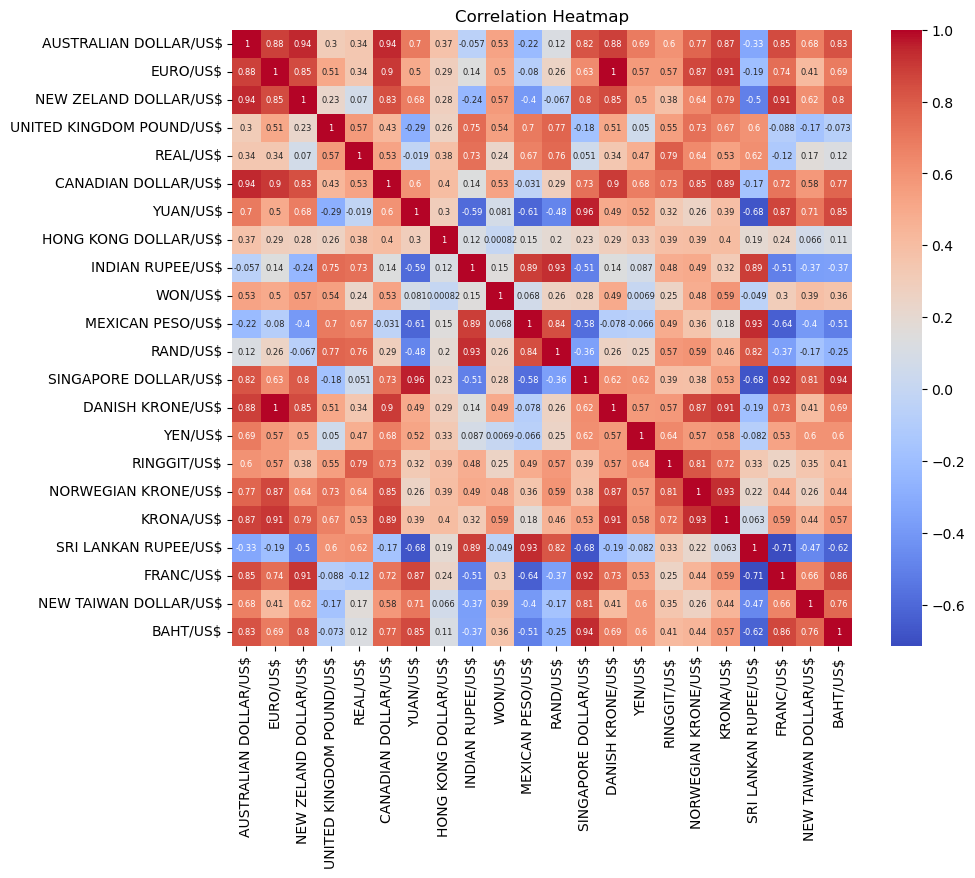

In [38]:
import seaborn as sns

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

In [45]:
# Find pairs with correlation above 0.8 (excluding 1)
correlation_upper_threshold = 0.8
correlation_lower_threshold = -0.6

correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation_value = correlation_matrix.iloc[i, j]
        if (correlation_value > correlation_upper_threshold or correlation_value < correlation_lower_threshold) and correlation_value != 1:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            correlation_pairs.append(pair)

print("Correlated Pairs:")
for pair in correlation_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {correlation_matrix.loc[pair[0], pair[1]]}")

Correlated Pairs:
AUSTRALIAN DOLLAR/US$ and EURO/US$ with correlation 0.8846318785398644
AUSTRALIAN DOLLAR/US$ and NEW ZELAND DOLLAR/US$ with correlation 0.9422975051307709
AUSTRALIAN DOLLAR/US$ and CANADIAN DOLLAR/US$ with correlation 0.94317159867485
AUSTRALIAN DOLLAR/US$ and SINGAPORE DOLLAR/US$ with correlation 0.8229221387064154
AUSTRALIAN DOLLAR/US$ and DANISH KRONE/US$ with correlation 0.8840562470136348
AUSTRALIAN DOLLAR/US$ and KRONA/US$ with correlation 0.8748777914321628
AUSTRALIAN DOLLAR/US$ and FRANC/US$ with correlation 0.8470238727759919
AUSTRALIAN DOLLAR/US$ and BAHT/US$ with correlation 0.8310191369550941
EURO/US$ and NEW ZELAND DOLLAR/US$ with correlation 0.8515581077936043
EURO/US$ and CANADIAN DOLLAR/US$ with correlation 0.8996511989526494
EURO/US$ and DANISH KRONE/US$ with correlation 0.9999169412132296
EURO/US$ and NORWEGIAN KRONE/US$ with correlation 0.8658381933132894
EURO/US$ and KRONA/US$ with correlation 0.9101768310978573
NEW ZELAND DOLLAR/US$ and CANADIAN D

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(df_er_transposed, method='average')
dendrogram(linkage_matrix, labels=df_er_transposed.index, leaf_rotation=90, leaf_font_size=8, orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

NameError: name 'df_er_transposed' is not defined

In [55]:
row_to_exclude = []
df_er_transposed_filtered = df_er_transposed[~df_er_transposed.index.isin(row_to_exclude)]

print(df_er_transposed.shape)
print(df_er_transposed_filtered.shape)

(22, 5015)
(22, 5015)


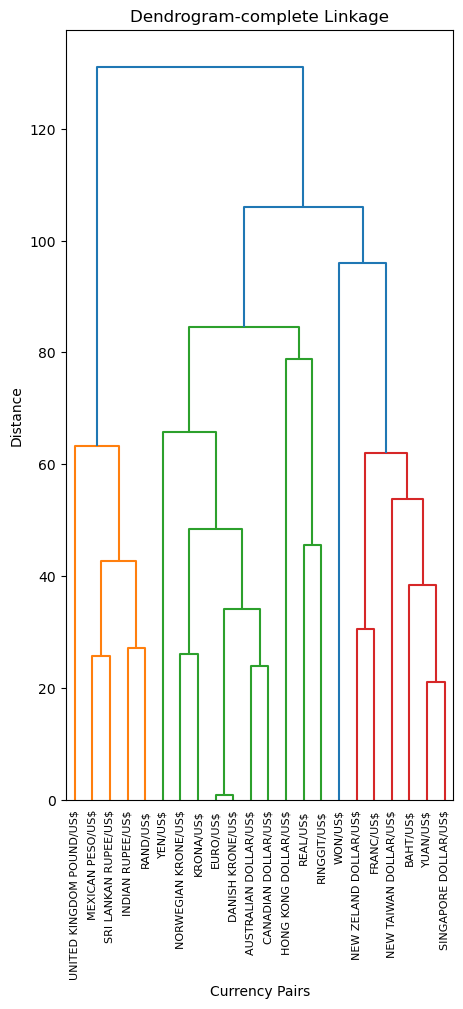

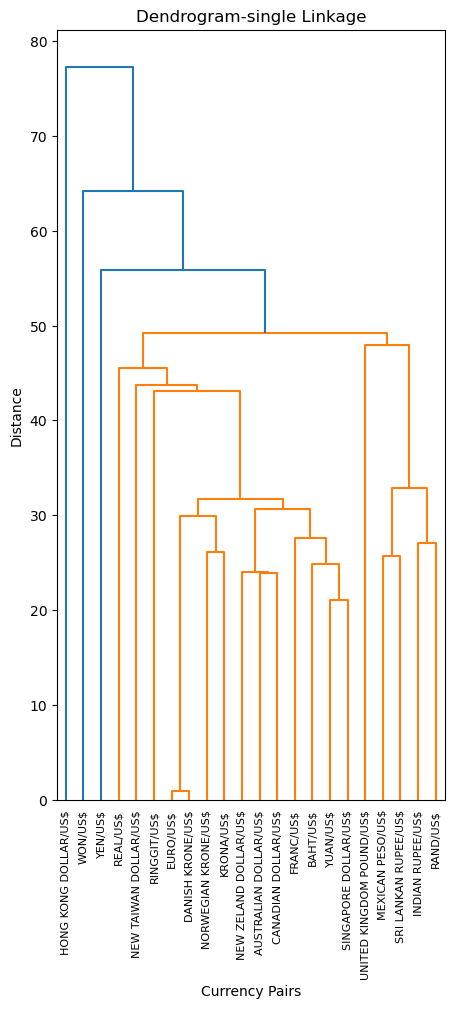

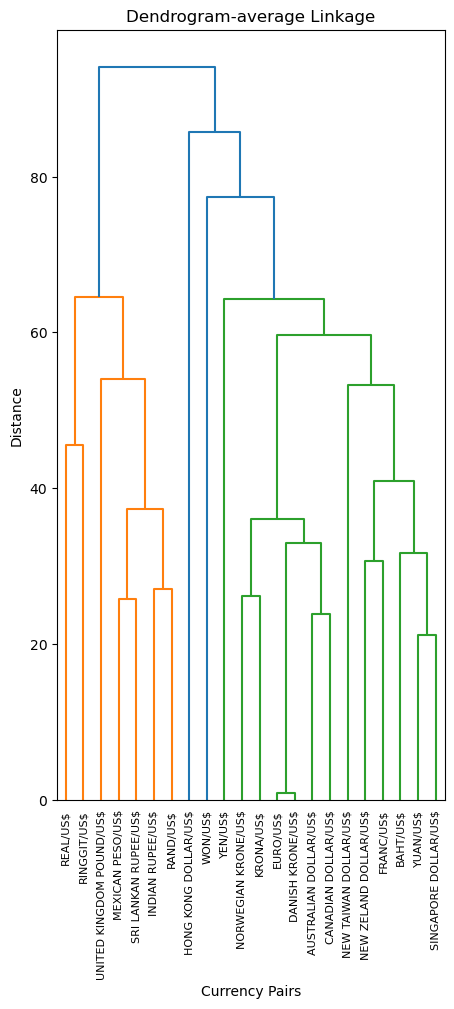

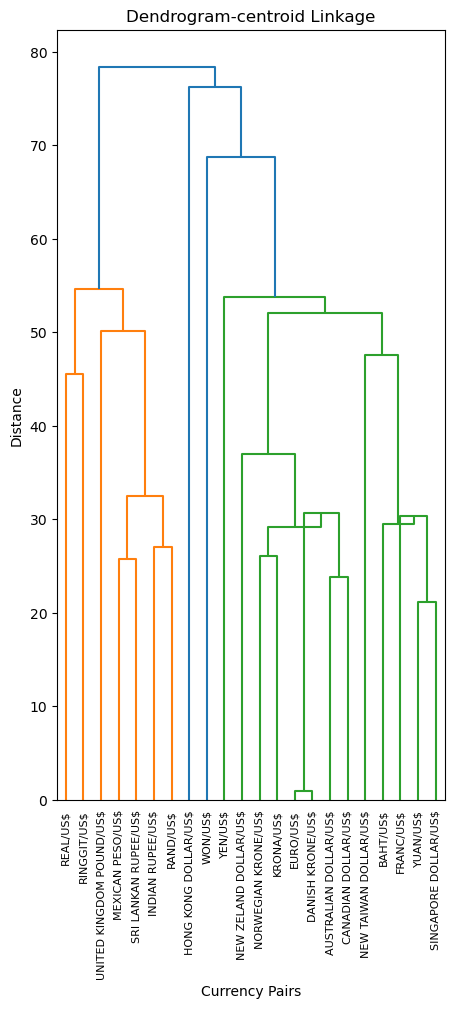

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#Heirachical clustering 
methods = ['complete', 'single', 'average', 'centroid']

for method in methods:
    linkage_matrix = linkage(df_er_transposed_filtered, method)
    
    plt.figure(figsize=(5, 10))
    dendrogram(linkage_matrix, labels=df_er_transposed_filtered.index, leaf_rotation=90, leaf_font_size=8, show_leaf_counts=True)
    
    plt.title(f"Dendrogram-{method} Linkage")
    plt.xlabel("Currency Pairs")
    plt.ylabel("Distance")
    plt.show()

In [57]:
#K means clustering
#print(df_er_transposed_filtered.head())
#print(type(df_er_transposed_filtered))
labels = df_er_transposed_filtered.index.tolist()
print(labels)
X = df_er_transposed_filtered.reset_index(drop=True)
print(X.head())

['AUSTRALIAN DOLLAR/US$', 'EURO/US$', 'NEW ZELAND DOLLAR/US$', 'UNITED KINGDOM POUND/US$', 'REAL/US$', 'CANADIAN DOLLAR/US$', 'YUAN/US$', 'HONG KONG DOLLAR/US$', 'INDIAN RUPEE/US$', 'WON/US$', 'MEXICAN PESO/US$', 'RAND/US$', 'SINGAPORE DOLLAR/US$', 'DANISH KRONE/US$', 'YEN/US$', 'RINGGIT/US$', 'NORWEGIAN KRONE/US$', 'KRONA/US$', 'SRI LANKAN RUPEE/US$', 'FRANC/US$', 'NEW TAIWAN DOLLAR/US$', 'BAHT/US$']
       0         1         2         3         4         5         6     \
0  0.685469  0.710288  0.720661  0.729551  0.722513  0.711400  0.699175   
1  1.109394  0.993476  0.974550  0.982436  1.004516  1.036058  0.984013   
2  1.065501  1.126263  1.156200  1.184951  1.168352  1.159460  1.163906   
3 -0.313319 -0.358138 -0.378731 -0.405380 -0.364195 -0.360561 -0.407803   
4 -1.026681 -0.977659 -0.956254 -0.978349 -0.990777 -1.007348 -1.002515   

       7         8         9     ...      5206      5207      5208      5209  \
0  0.696582  0.604712  0.623234  ...  0.475428  0.469871  0.4439

/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

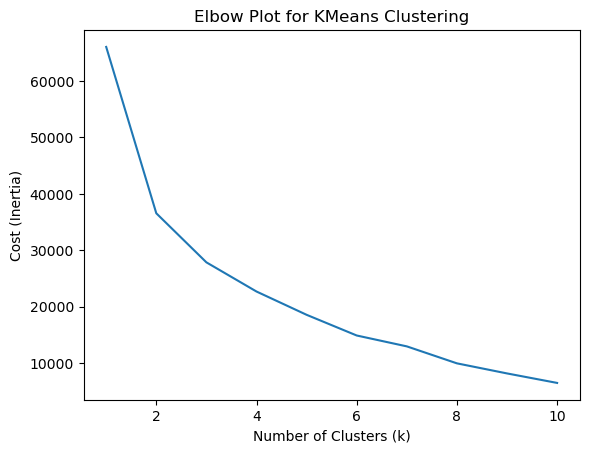

In [58]:
from sklearn.cluster import KMeans

#K means clustering
costs = []
k_values = [1,2,3,4,5,6,7,8,9,10]
for k in k_values:
    clustering = KMeans(n_clusters=k)
    
    # Fit the model and calculate the cost
    clustering.fit(X)
    costs.append(clustering.inertia_)

plt.plot(k_values, costs)
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show()

In [59]:
import numpy as np

optimal_k = 5
np.random.seed(42) 
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)
cluster_assignments = kmeans.labels_
print(cluster_assignments)
print(labels)

[1 1 1 2 3 1 4 0 2 1 2 2 4 1 3 3 1 1 2 4 4 4]
['AUSTRALIAN DOLLAR/US$', 'EURO/US$', 'NEW ZELAND DOLLAR/US$', 'UNITED KINGDOM POUND/US$', 'REAL/US$', 'CANADIAN DOLLAR/US$', 'YUAN/US$', 'HONG KONG DOLLAR/US$', 'INDIAN RUPEE/US$', 'WON/US$', 'MEXICAN PESO/US$', 'RAND/US$', 'SINGAPORE DOLLAR/US$', 'DANISH KRONE/US$', 'YEN/US$', 'RINGGIT/US$', 'NORWEGIAN KRONE/US$', 'KRONA/US$', 'SRI LANKAN RUPEE/US$', 'FRANC/US$', 'NEW TAIWAN DOLLAR/US$', 'BAHT/US$']


/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
cluster_dict = {}

for currency, cluster in zip(labels, cluster_assignments):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = [currency]
    else:
        cluster_dict[cluster].append(currency)

for cluster, currencies in cluster_dict.items():
    print(f"Cluster {cluster}: {', '.join(currencies)}")

Cluster 1: AUSTRALIAN DOLLAR/US$, EURO/US$, NEW ZELAND DOLLAR/US$, CANADIAN DOLLAR/US$, WON/US$, DANISH KRONE/US$, NORWEGIAN KRONE/US$, KRONA/US$
Cluster 2: UNITED KINGDOM POUND/US$, INDIAN RUPEE/US$, MEXICAN PESO/US$, RAND/US$, SRI LANKAN RUPEE/US$
Cluster 3: REAL/US$, YEN/US$, RINGGIT/US$
Cluster 4: YUAN/US$, SINGAPORE DOLLAR/US$, FRANC/US$, NEW TAIWAN DOLLAR/US$, BAHT/US$
Cluster 0: HONG KONG DOLLAR/US$


In [61]:
optimal_k = 8
np.random.seed(42) 
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)
cluster_assignments = kmeans.labels_
print(cluster_assignments)
print(labels)

[2 3 2 1 7 3 4 5 1 6 1 1 4 3 0 7 3 3 1 2 4 4]
['AUSTRALIAN DOLLAR/US$', 'EURO/US$', 'NEW ZELAND DOLLAR/US$', 'UNITED KINGDOM POUND/US$', 'REAL/US$', 'CANADIAN DOLLAR/US$', 'YUAN/US$', 'HONG KONG DOLLAR/US$', 'INDIAN RUPEE/US$', 'WON/US$', 'MEXICAN PESO/US$', 'RAND/US$', 'SINGAPORE DOLLAR/US$', 'DANISH KRONE/US$', 'YEN/US$', 'RINGGIT/US$', 'NORWEGIAN KRONE/US$', 'KRONA/US$', 'SRI LANKAN RUPEE/US$', 'FRANC/US$', 'NEW TAIWAN DOLLAR/US$', 'BAHT/US$']


/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
cluster_dict = {}

for currency, cluster in zip(labels, cluster_assignments):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = [currency]
    else:
        cluster_dict[cluster].append(currency)

for cluster, currencies in cluster_dict.items():
    print(f"Cluster {cluster}: {', '.join(currencies)}")

Cluster 2: AUSTRALIAN DOLLAR/US$, NEW ZELAND DOLLAR/US$, FRANC/US$
Cluster 3: EURO/US$, CANADIAN DOLLAR/US$, DANISH KRONE/US$, NORWEGIAN KRONE/US$, KRONA/US$
Cluster 1: UNITED KINGDOM POUND/US$, INDIAN RUPEE/US$, MEXICAN PESO/US$, RAND/US$, SRI LANKAN RUPEE/US$
Cluster 7: REAL/US$, RINGGIT/US$
Cluster 4: YUAN/US$, SINGAPORE DOLLAR/US$, NEW TAIWAN DOLLAR/US$, BAHT/US$
Cluster 5: HONG KONG DOLLAR/US$
Cluster 6: WON/US$
Cluster 0: YEN/US$
